# Results summary 

### Multiclass model (Hyper, Neutral_hyper, Hypo, Neutral_hypo) without pca
- 40 % accuracy (chance = 25%)
- Chi-square test on the confusion matrix : χ2 = 103.38, p < .00001
- hyper vs hypoalgesia : 73 % accuracy with χ2 = 32.58, p < .00001
- Nhypo vs Nhyper : 70% accuracy with χ2 = 30.37, p < 0.000000 
### Multiclass model (Hyper, Neutral_hyper, Hypo, Neutral_hypo) with pca
- 37 % accuracy (chance = 25%)
- Chi-square test on the confusion matrix : χ2 = 83.15 p < .00001
- Khi2 statistic = 83.148399 and p value = 0.000000 
- hyper vs hypoalgesia : 72 % accuracy with χ2 = 25.27 and p value = 0.000003

### Train on hyper run (hyper + N_hyper) and test on hypo run (hypo + N_hypo)
- 47 % accuracy
- Khi2 statistic = 4.16 and p value = 0.12
### Train on Hypo run and tested on Hyper run
- 49 % accuracy
- Khi2 statistic = 1.85 and p value = 0.39

### Run Hypo&nHypo vs run Hyper&nHyper
- 66 % acuracy
- Khi2 statistic = 56.56 and p value = 0.000000 
### Model on ANA run (Hypo vs N_hypo)
- 52 % accuracy          
- Khi2 statistic = 0.78 and p value = 0.68
### Model on Hyper run (hyper vs N_hyper)
- 54 % accuracy
- Khi2 statistic = 4.33 and p value = 0.11 


# Decoding visualization

### Load data

In [3]:
import os
import pickle

In [8]:
res_path = r'E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\results_mvpa\SVC_5f_ovo'
#res_path = r'E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\results_mvpa\mvpa\svc_5fold_pca' # with pca

In [9]:
os.chdir(res_path)
pwd = os.getcwd()
print(pwd)

E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\results_mvpa\SVC_5f_ovo


In [10]:
with open('final_results.pickle', 'rb') as handle:
        final_results = pickle.load(handle)
with open('final_model_SVC.pickle', 'rb') as handle:
        model = pickle.load(handle)    
with open('kfold_results.pickle', 'rb') as handle:
        kfold_results = pickle.load(handle)

In [11]:
model

SVC(decision_function_shape='ovo', kernel='linear', probability=True)

In [12]:
classes = ['N_HYPO', 'HYPO', 'N_HYPER', 'HYPER']

## Kfold results


In [13]:
# kfold_results
kfold_metrics = kfold_results['df_fold_metrics']
kfold_cm =  kfold_results['confusion_matrix'] 
kfold_roc_auc = kfold_results['roc_auc_ovo'] 


In [14]:
n_componentsPCA = kfold_results['pca_n_components']
kfold_metrics.insert(2, "PCA", n_componentsPCA)

KeyError: 'pca_n_components'

In [15]:
kfold_metrics


,accuracy,balanced_accuracy,precision
fold1,0.391204,0.393144,0.391614
fold2,0.342593,0.34416,0.342481
fold3,0.371638,0.3725,0.376792
fold4,0.340278,0.343777,0.341086
fold5,0.393643,0.392993,0.396702
final_model,NaN,NaN,NaN


### K_fold confusion matrices

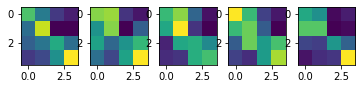

In [16]:
import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

f, axarr = plt.subplots(1,5)
i = 0
for element in kfold_cm.keys():
    cm = kfold_cm[element]
    #cm_display = ConfusionMatrixDisplay(cm, display_labels =  classes).plot()
    
    axarr[i].imshow(kfold_cm[element],interpolation='nearest')
    i+=1


## Final model
- decision_function : is a (Y_test.shape[0], nb. classes) dim array. It gives the distance of each sample to the hyperplane 

In [17]:
final_results

{'y_pred_metrics':    accuracy  balanced_accuracy  precision
 0       0.4           0.399129   0.400558,
 'Y_pred': array([3, 2, 4, 4, 2, 4, 3, 3, 2, 2, 4, 3, 1, 3, 3, 1, 3, 3, 4, 4, 4, 3,
        1, 2, 4, 3, 4, 2, 1, 4, 1, 1, 4, 2, 1, 3, 1, 2, 1, 4, 4, 1, 2, 3,
        2, 2, 2, 3, 1, 1, 1, 1, 4, 3, 1, 4, 3, 3, 1, 1, 1, 2, 1, 2, 2, 1,
        1, 2, 1, 1, 2, 1, 3, 3, 1, 2, 2, 3, 1, 1, 2, 1, 4, 2, 2, 4, 2, 3,
        4, 1, 3, 4, 3, 2, 3, 1, 4, 1, 2, 4, 3, 1, 1, 2, 2, 1, 3, 2, 1, 3,
        3, 2, 1, 2, 4, 2, 4, 1, 3, 1, 2, 4, 4, 3, 2, 1, 4, 3, 2, 4, 1, 1,
        3, 2, 3, 3, 1, 1, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 1, 1, 1, 2, 4, 3,
        2, 2, 3, 1, 3, 2, 3, 3, 3, 1, 3, 1, 3, 3, 2, 3, 2, 1, 1, 3, 1, 4,
        3, 4, 1, 2, 3, 2, 1, 1, 4, 4, 1, 1, 3, 4, 1, 3, 2, 3, 2, 4, 2, 3,
        2, 4, 2, 2, 2, 4, 2, 1, 2, 2, 4, 3, 4, 2, 3, 1, 1, 4, 1, 3, 3, 4,
        1, 1, 3, 1, 1, 1, 1, 2, 3, 1, 2, 1, 4, 4, 2, 4, 2, 1, 3, 4, 1, 4,
        2, 4, 4, 4, 3, 1, 4, 1, 1, 4, 4, 1, 4, 1, 2, 2, 1, 2, 3, 3, 2, 

In [18]:
y_pred_metrics = final_results['y_pred_metrics']
decision = final_results['decision_function']
y_pred_metrics


,accuracy,balanced_accuracy,precision
0,0.4,0.399129,0.400558


### Confusion matrix of final model

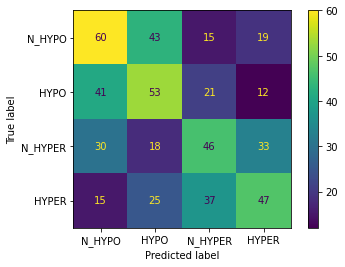

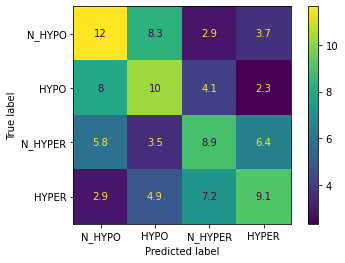

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = final_results['confusion_matrix']
#['HYPO_N', 'HYPO', 'HYPER_N', 'HYPER']

cm_display = ConfusionMatrixDisplay(cm, display_labels =  classes).plot()
ConfusionMatrixDisplay(((1/515)*cm)*100, display_labels =  classes).plot()

In [21]:
# print sum of each row
sum = 0 
for i in range(cm.shape[1]):
    print(cm[i, :].sum())
    sum += cm[i, :].sum()
sum


137
127
127
124


515

### KHI2 on confusion matrix 

In [22]:
from scipy.stats import chisquare
import numpy as np

# Expected frequencies

df_exp_f = np.zeros(cm.shape) # create a dataframe for expected frequencies
for i in range(cm.shape[1]):
    row = cm[i, :]
    exp = row.sum()/cm.shape[0] # get column's expected probability
    exp_col = np.full((cm.shape[0]),exp) # create row vector with 'exp' as values
    df_exp_f[i,:] = exp_col # replace exp_col in the df_exp_f
print('dataframe of expected frequencies : \n{}'.format(df_exp_f))
    
ddof = 3 # ddof id (4-1)(4-1) = 9
chi2_results = chisquare(cm, f_exp = df_exp_f, ddof = ddof, axis = None) 

dataframe of expected frequencies : 
[[34.25 34.25 34.25 34.25]
 [31.75 31.75 31.75 31.75]
 [31.75 31.75 31.75 31.75]
 [31.   31.   31.   31.  ]]


### Result

In [23]:
# Functions
import numpy as np
import pandas as pd

#XY = b = np.load('XY_data_split.npz', allow_pickle = True)
#Y_test = XY['Y_test']
Y_pred = final_results['Y_pred']
def filter_Y(c1, c2, Y_test, Y_pred, c3 = None):
    
    filt_test = []
    filt_pred = []
    idx = 0 
    for item in Y_test:
        if c3 is not None:
            if item == c1 or item == c2 or item == c3:
                filt_test.append(Y_test[idx])
                filt_pred.append(Y_pred[idx])
        else:
            if item == c1 or item == c2:
                filt_test.append(Y_test[idx])
                filt_pred.append(Y_pred[idx])
        idx += 1
    
    return filt_test, filt_pred

def accuracy22(cm22):
    TP = cm22[0,0] + cm22[1,1]
    total = 0 
    for i in range(cm22.shape[1]):
        #print(cm22[i, :].sum())
        total += cm22[i, :].sum()
        
    accuracy22 = TP/total    
    return accuracy22

## Main contrast

### Hypo - hyperalgesia

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

# class 2 is hypo and class 4 is hyper
filt_true, filt_pred = filter_Y(1,4,Y_test, Y_pred)
hypo_hyper_class = ['Hypo', 'Hyper']
#acc_hyper_hypo = accuracy_score(filt_true, filt_pred)
cm_hyper_hypo = confusion_matrix(filt_true, filt_pred)[1::2, 1::2]
acc_hyper_hypo = accuracy22(cm_hyper_hypo)
print('Accuracy : ', acc_hyper_hypo)
ConfusionMatrixDisplay(cm_hyper_hypo, display_labels =  hypo_hyper_class).plot()
ConfusionMatrixDisplay(((1/137)*cm_hyper_hypo)*100, display_labels =  Nhypo_hyper_class).plot() 

NameError: name 'Y_test' is not defined

Accuracy :  0.7164179104477612


NameError: name 'Nhypo_hyper_class' is not defined

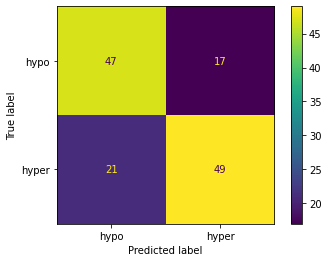

In [36]:
acc_hyper_hypo = accuracy22(cm_hyper_hypo)
print('Accuracy : ', acc_hyper_hypo)
ConfusionMatrixDisplay(cm_hyper_hypo, display_labels =  hypo_hyper_class).plot()
ConfusionMatrixDisplay(((1/137)*cm_hyper_hypo)*100, display_labels =  Nhypo_hyper_class).plot() 

In [37]:

df_exp_f = np.zeros(cm_hyper_hypo.shape) # create a dataframe for expected frequencies
for i in range(cm_hyper_hypo.shape[1]):
    row = cm_hyper_hypo[i, :]
    exp = row.sum()/cm_hyper_hypo.shape[0] # get column's expected probability
    exp_col = np.full((cm_hyper_hypo.shape[0]),exp) # create row vector with 'exp' as values
    df_exp_f[i,:] = exp_col # replace exp_col in the df_exp_f
print('dataframe of expected frequencies : \n{}'.format(df_exp_f))
    
ddof = 1 # ddof id (4-1)(4-1) = 9
chi2_results = chisquare(cm_hyper_hypo, f_exp = df_exp_f, ddof = ddof, axis = None) 
print('Khi2 statistic = {:f} and p value = {:f} for degree of freedom = {:f}'.format(chi2_results[0],chi2_results[1],ddof))

dataframe of expected frequencies : 
[[32. 32.]
 [35. 35.]]
Khi2 statistic = 25.262500 and p value = 0.000003 for degree of freedom = 1.000000


## ROC curve

In [33]:
tpr = 53/(53+12)


0.6527777777777778

0.3472222222222222 0.8153846153846154


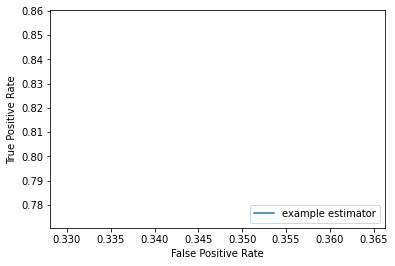

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
fpr = 25/(25+47)
tpr = 53/(53+12)
print(fpr, tpr)
#fpr, tpr, thresholds = metrics.roc_curve(y, pred)
#roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr,estimator_name='example estimator')
display.plot()
plt.show()

### Hypo - N_hypo

accuracy :  0.5549738219895288


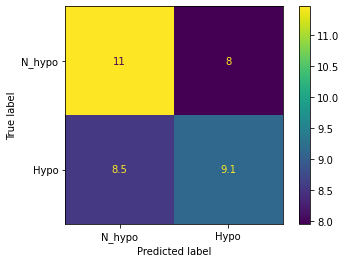

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix

# class 1 is N_ and class 4 is hyper
filt_true, filt_pred = filter_Y(1,2,Y_test, Y_pred)
Nhypo_hyper_class = ['N_hypo', 'Hypo']
acc_nhypo_hypo = accuracy_score(filt_true, filt_pred)
cm_hypo_nhypo = confusion_matrix(filt_true, filt_pred)[0:2,0:2]
acc_hypo_nhypo = accuracy22(cm_hypo_nhypo)
print('accuracy : ', acc_hypo_nhypo)
ConfusionMatrixDisplay(cm_hypo_nhypo, display_labels =  Nhypo_hyper_class).plot()


In [51]:
df_exp_f = np.zeros(cm_hypo_nhypo.shape) # create a dataframe for expected frequencies
for i in range(cm_hypo_nhypo.shape[1]):
    row = cm_hypo_nhypo[i, :]
    exp = row.sum()/cm_hypo_nhypo.shape[0] # get column's expected probability
    exp_col = np.full((cm_hypo_nhypo.shape[0]),exp) # create row vector with 'exp' as values
    df_exp_f[i,:] = exp_col # replace exp_col in the df_exp_f
print('dataframe of expected frequencies : \n{}'.format(df_exp_f))
    
ddof = 1 # ddof id (4-1)(4-1) = 9
chi2_results = chisquare(cm_hypo_nhypo, f_exp = df_exp_f, ddof = ddof, axis = None) 
print('Khi2 statistic = {:f} and p value = {:f} for degree of freedom = {:f}'.format(chi2_results[0],chi2_results[1],ddof))

dataframe of expected frequencies : 
[[50.  50. ]
 [45.5 45.5]]
Khi2 statistic = 3.338901 and p value = 0.188351 for degree of freedom = 1.000000


### Hyper - N_hyper

In [64]:
cm_hyper_Nhyper = np.array([[46,33],[37,47]])

accuracy :  0.5705521472392638


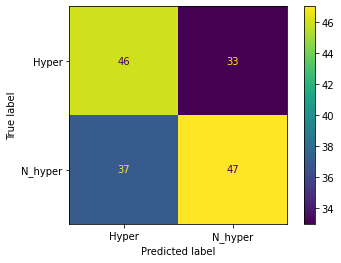

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix

# class 1 is N_ and class 4 is hyper
filt_true, filt_pred = filter_Y(3,4,Y_test, Y_pred)
hyper_Nhyper_class = ['Hyper', 'N_hyper']
#cm_hyper_Nhyper= confusion_matrix(filt_true, filt_pred)[0::3,0::3]
acc_hyper_Nhyper = accuracy22(cm_hyper_Nhyper)
print('accuracy : ', acc_hyper_Nhyper)
ConfusionMatrixDisplay(cm_hyper_Nhyper, display_labels =  hyper_Nhyper_class).plot()

In [67]:
df_exp_f = np.zeros(cm_hyper_Nhyper.shape) # create a dataframe for expected frequencies
for i in range(cm_hyper_Nhyper.shape[1]):
    row = cm_hyper_Nhyper[i, :]
    exp = row.sum()/cm_hyper_Nhyper.shape[0] # get column's expected probability
    exp_col = np.full((cm_hyper_Nhyper.shape[0]),exp) # create row vector with 'exp' as values
    df_exp_f[i,:] = exp_col # replace exp_col in the df_exp_f
print('dataframe of expected frequencies : \n{}'.format(df_exp_f))
    
ddof = 1 # ddof id (4-1)(4-1) = 9
chi2_results = chisquare(cm_hyper_Nhyper, f_exp = df_exp_f, ddof = ddof, axis = None) 
print('Khi2 statistic = {:f} and p value = {:f} for degree of freedom = {:f}'.format(chi2_results[0],chi2_results[1],ddof))

dataframe of expected frequencies : 
[[39.5 39.5]
 [42.  42. ]]
Khi2 statistic = 3.329717 and p value = 0.189217 for degree of freedom = 1.000000


In [34]:
#function for khi2 expected frequencies
def exp_freq(cm): #/!\ makes a vertical sum
    df_exp_f = np.zeros(cm.shape) # create an empty dataframe for expected frequencies
    for i in range(cm.shape[1]):
        row = cm[i, :]
        exp = row.sum()/cm.shape[0] # get column's expected probability
        exp_col = np.full((cm.shape[0]),exp) # create row vector with 'exp' as values
        df_exp_f[i,:] = exp_col # replace exp_col in the df_exp_f
    return df_exp_f

### N_hypo - N_hyper

accuracy :  0.7019867549668874
Khi2 statistic = 30.368421 and p value = 0.000000 for degree of freedom = 1.000000


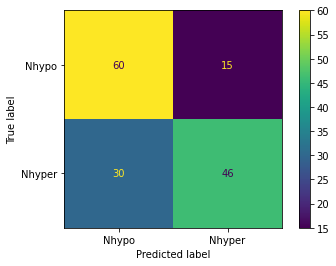

In [35]:
cm_nhypo_nhyper = np.array([[60,15],[30,46]])
cm_nhypo_nhyper_class = ['Nhypo', 'Nhyper']
acc_nhypo_nhyper = accuracy22(cm_nhypo_nhyper)
print('accuracy : ', acc_nhypo_nhyper)
ConfusionMatrixDisplay(cm_nhypo_nhyper, display_labels =  cm_nhypo_nhyper_class).plot()

#khi test
ddof = 1 # ddof id (4-1)(4-1) = 9
chi2_results = chisquare(cm_nhypo_nhyper, f_exp = exp_freq(cm_nhypo_nhyper), ddof = ddof, axis = None) 
print('Khi2 statistic = {:f} and p value = {:f} for degree of freedom = {:f}'.format(chi2_results[0],chi2_results[1],ddof))

## Brain signatures

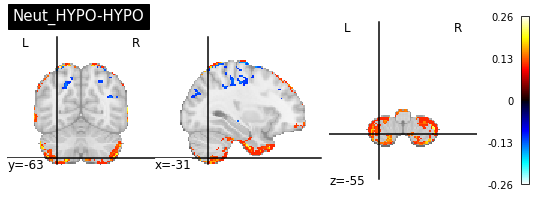

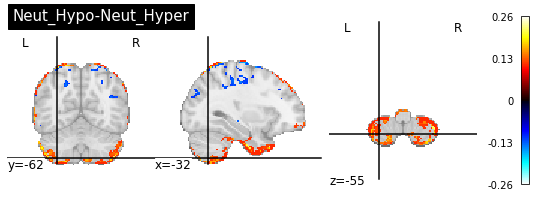

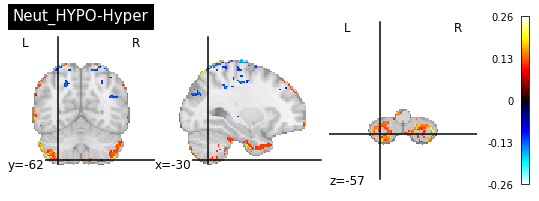

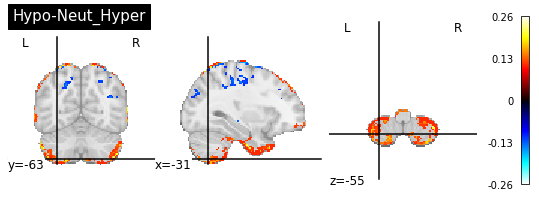

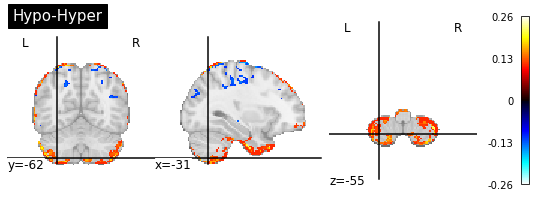

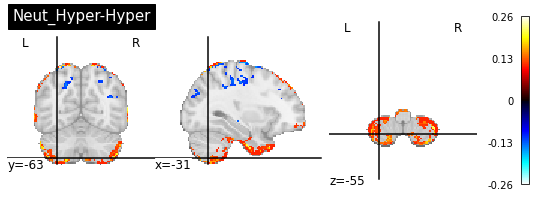

In [54]:
from nilearn import plotting
import nibabel as nib
from nilearn import image
title = ['','Neut_HYPO-HYPO','Neut_Hypo-Neut_Hyper','Neut_HYPO-Hyper', 'Hypo-Neut_Hyper', 'Hypo-Hyper', 'Neut_Hyper-Hyper']

for i in range(1,7):
    
    img = nib.load(f"coeffs_whole_brain_{i}.nii.gz")
    tresh_img = image.threshold_img(img, threshold = '99%')
    plotting.plot_stat_map(tresh_img,threshold= 0.0001,title = title[i] )
    #plotting.view_img(tresh_img, vmax=4, cut_coords=[-42, -16, 52], title="shock")
    #view = plotting.view_img_on_surf(tresh_img, threshold='90%', surf_mesh='fsaverage') 
    #view.open_in_browser() 

## Covariance correction

(Haufe et al., 2014)

That is, the activation pattern can be approximated by calculating the covariance Cov[x(n), y(n)]
(not the correlation Corr[x(n), y(n)]) of each single channel's data with the target variable, 
which amounts to a purely mass-univariate analysis.

For each classification dataset, we computed the mass-univariate correlation Corr[x(n), y(n)] of the class label with each channel reading, as well as the mass-univariate covariance Cov[x(n), y(n)]

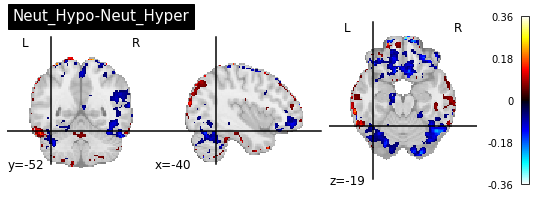

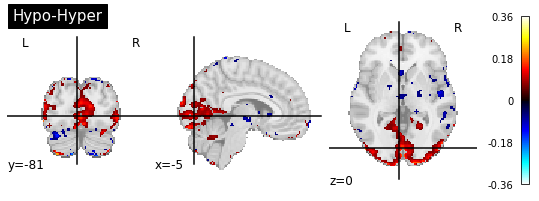

In [41]:
from nilearn import plotting
import nibabel as nib
from nilearn import image
title = ['','Neut_HYPO-HYPO','Neut_Hypo-Neut_Hyper','Neut_HYPO-Hyper', 'Hypo-Neut_Hyper', 'Hypo-Hyper', 'Neut_Hyper-Hyper']

for i in range(1,7):
     if i == 2 or i == 5:
        img = nib.load(f"eq6_adj_coeff_whole_brain_{i}.nii.gz")
        tresh_img = image.threshold_img(img, threshold = '99%')
        plotting.plot_stat_map(tresh_img,threshold= 0.0001,title = title[i] )
        #html_view = plotting.view_img(tresh_img, vmax=np.amax(tresh_img.get_data()), cut_coords=[-42, -16, 52], title = title[i])
        view = plotting.view_img_on_surf(tresh_img, threshold='90%', surf_mesh='fsaverage', title = title[i])
        view.open_in_browser() 


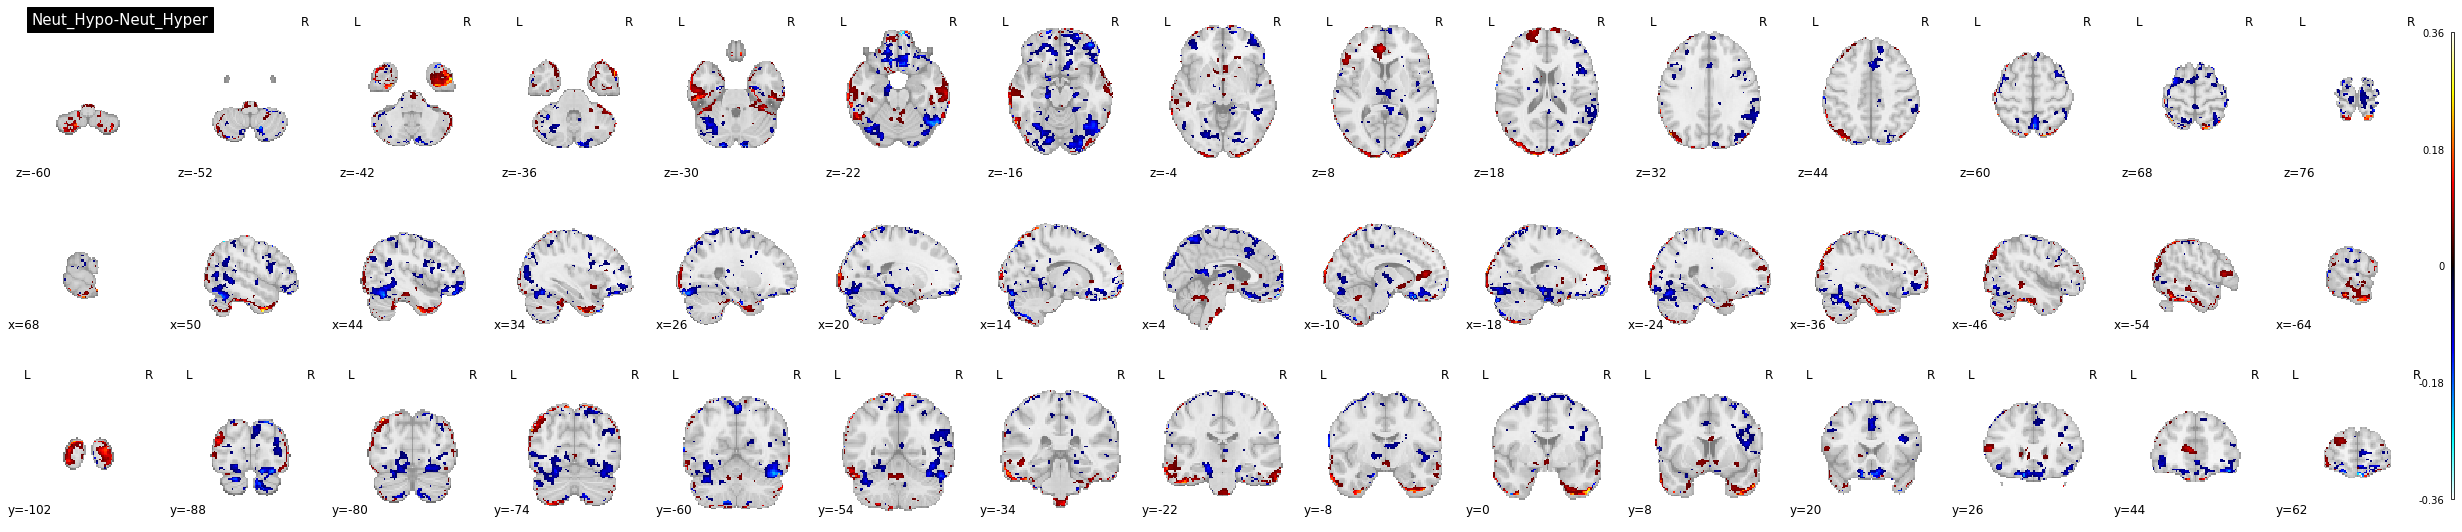

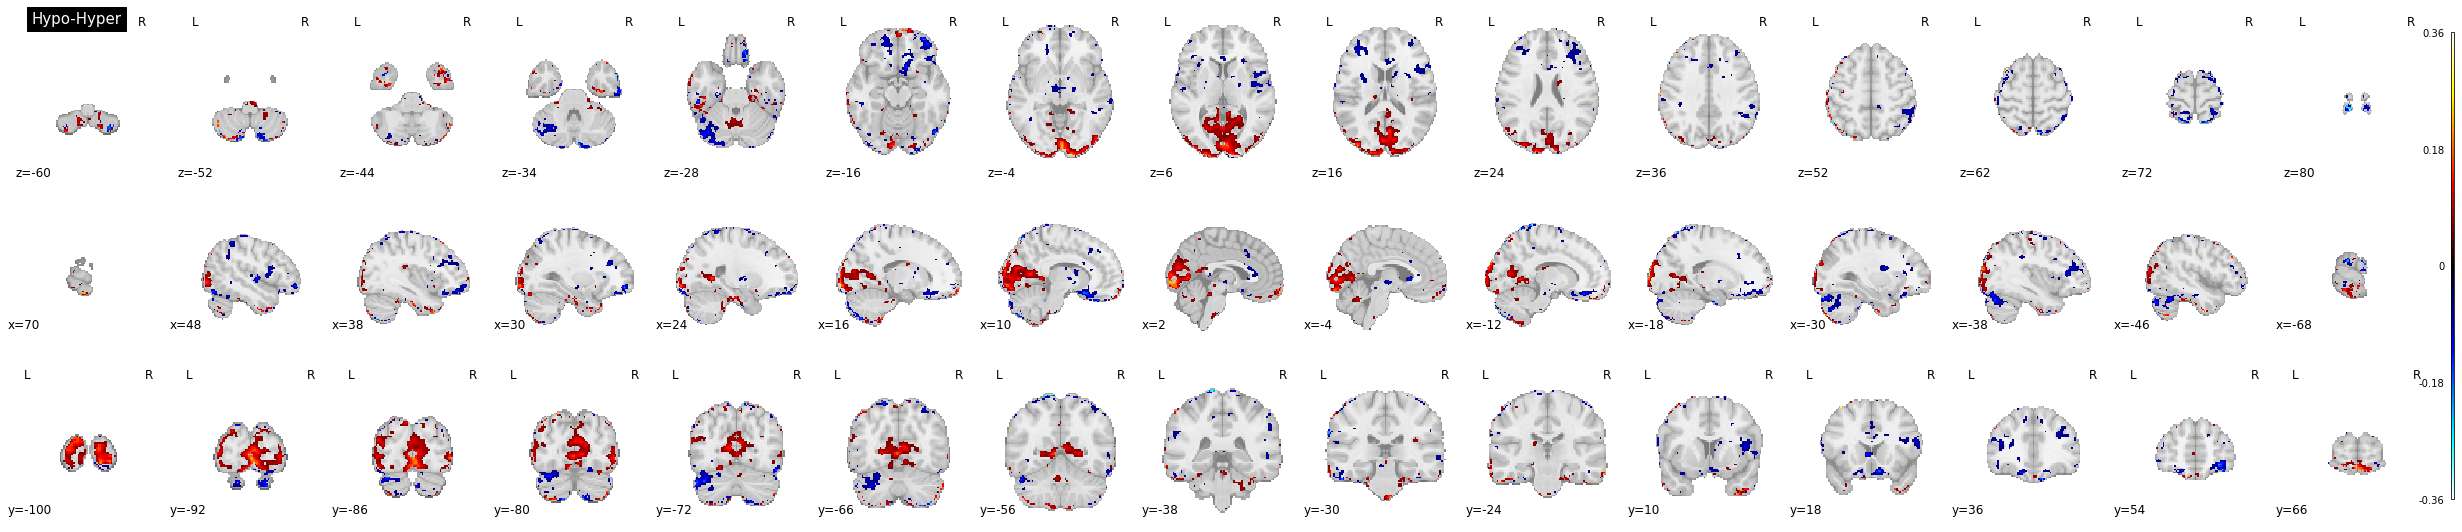

In [40]:
### Mosaic for a specific contrast
from nilearn import plotting
import nibabel as nib
from nilearn import image
title = ['','Neut_HYPO-HYPO','Neut_Hypo-Neut_Hyper','Neut_HYPO-Hyper', 'Hypo-Neut_Hyper', 'Hypo-Hyper', 'Neut_Hyper-Hyper']

for i in range(1,7):
    if i == 2 or i == 5: # to visualize Neut_Hypo-Neut_Hyper and Hypo-Hyper
        img = nib.load(f"eq6_adj_coeff_whole_brain_{i}.nii.gz")
        tresh_img = image.threshold_img(img, threshold = '99%')
        plotting.plot_stat_map(tresh_img, display_mode='mosaic', cut_coords=(15, 15, 15),
                               title=title[i])

In [ ]:
### N

In [ ]:

i = 5 # 5 is hypo-hyper 
img = nib.load(f"eq6_adj_coeff_whole_brain_{i}.nii.gz")
tresh_img = image.threshold_img(img, threshold = '99%')
plotting.plot_stat_map(tresh_img, display_mode='mosaic', cut_coords=(15, 15, 15),
                       title="display_mode='mosaic' default cut_coords")

In [56]:
from nilearn import image
for i in range(1,7):
    
    img = nib.load(f"eq6_adj_coeff_whole_brain_{i}.nii.gz")
    tresh_img = image.threshold_img(img, threshold = '99%')
    #smooth_anat_img = image.smooth_img(img, fwhm=4)
    #plotting.plot_stat_map(tresh_img,threshold= 0.0001,title = title[i] )
    html_view = plotting.view_img(tresh_img, vmax=np.amax(tresh_img.get_data()), cut_coords=[-42, -16, 52], title = title[i])
    #view = plotting.view_img_on_surf(tresh_img, threshold='90%', surf_mesh='fsaverage', title = title[i])
    html_view.open_in_browser() 
 



C:\Users\Dylan\AppData\Local\Temp\ipykernel_36736\1370144337.py:8: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  html_view = plotting.view_img(tresh_img, vmax=np.amax(tresh_img.get_data()), cut_coords=[-42, -16, 52], title = title[i])
C:\Users\Dylan\AppData\Local\Temp\ipykernel_36736\1370144337.py:8: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  html_view = plotting.view_img(tresh_img, vmax=np.amax(tresh_img.get_data()), cut_coords=[-42, -16, 52], title = title[i])


# SVC on ANA run

In [8]:
p = r'E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\results_mvpa\svc_ANA_run'
os.chdir(p)
pwd = os.getcwd()
print(pwd)
with open('final_results.pickle', 'rb') as handle:
    final_results = pickle.load(handle)
with open('final_model_SVC.pickle', 'rb') as handle:
        model = pickle.load(handle)    
#with open('kfold_results.pickle', 'rb') as handle:
        #kfold_results = pickle.load(handle)

E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\results_mvpa\svc_ANA_run


In [12]:
final_results

{'y_pred_metrics':    accuracy  balanced_accuracy  precision
 0  0.515504           0.514624   0.514634,
 'Y_pred': array([2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2,
        1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2,
        1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1,
        2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2,
        2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1,
        2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1,
        1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2,
        2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2,
        1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
        1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1,
        2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
        2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1], dtype=int64),


dataframe of expected frequencies : 
[[62. 62.]
 [67. 67.]]
Khi2 statistic = 0.778527 and p value = 0.677556 for degree of freedom = 1.000000


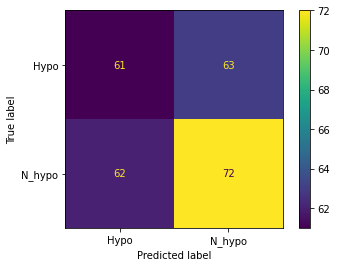

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = final_results['confusion_matrix']
cm_display = ConfusionMatrixDisplay(cm, display_labels = ['Hypo','N_hypo']).plot()

df_exp_f = np.zeros(cm.shape) # create a dataframe for expected frequencies
for i in range(cm.shape[1]):
    row = cm[i, :]
    exp = row.sum()/cm.shape[0] # get column's expected probability
    exp_col = np.full((cm.shape[0]),exp) # create row vector with 'exp' as values
    df_exp_f[i,:] = exp_col # replace exp_col in the df_exp_f
print('dataframe of expected frequencies : \n{}'.format(df_exp_f))
    
ddof = 1 # ddof id (4-1)(4-1) = 9
chi2_results = chisquare(cm, f_exp = df_exp_f, ddof = ddof, axis = None) 
print('Khi2 statistic = {:f} and p value = {:f} for degree of freedom = {:f}'.format(chi2_results[0],chi2_results[1],ddof))

# SVC on HYPER run

In [19]:
p = r'E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\results_mvpa\svc_HYPER_run'
os.chdir(p)
pwd = os.getcwd()
print(pwd)
with open('final_results.pickle', 'rb') as handle:
    final_results = pickle.load(handle)
with open('final_model_SVC.pickle', 'rb') as handle:
        model = pickle.load(handle)    
#with open('kfold_results.pickle', 'rb') as handle:
        #kfold_results = pickle.load(handle)

E:\Users\Dylan\Desktop\UdeM_H22\E_PSY3008\results_mvpa\svc_HYPER_run


In [20]:
final_results

{'y_pred_metrics':    accuracy  balanced_accuracy  precision
 0  0.542636           0.540744     0.5411,
 'Y_pred': array([1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2,
        1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
        2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2,
        1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1,
        1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2,
        1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2,
        1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1,
        1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2,
        1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1,
        1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1,
        1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int64),


dataframe of expected frequencies : 
[[67. 67.]
 [62. 62.]]
Khi2 statistic = 4.330766 and p value = 0.114706 for degree of freedom = 1.000000


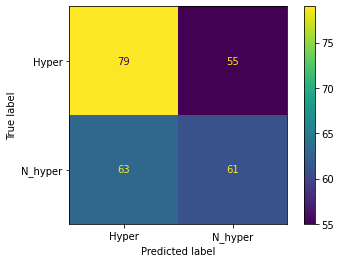

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = final_results['confusion_matrix']
cm_display = ConfusionMatrixDisplay(cm, display_labels = ['Hyper','N_hyper']).plot()
df_exp_f = np.zeros(cm.shape) # create a dataframe for expected frequencies
for i in range(cm.shape[1]):
    row = cm[i, :]
    exp = row.sum()/cm.shape[0] # get column's expected probability
    exp_col = np.full((cm.shape[0]),exp) # create row vector with 'exp' as values
    df_exp_f[i,:] = exp_col # replace exp_col in the df_exp_f
print('dataframe of expected frequencies : \n{}'.format(df_exp_f))
    
ddof = 1 # ddof id (4-1)(4-1) = 9
chi2_results = chisquare(cm, f_exp = df_exp_f, ddof = ddof, axis = None) 
print('Khi2 statistic = {:f} and p value = {:f} for degree of freedom = {:f}'.format(chi2_results[0],chi2_results[1],ddof))

## Train on hyper run and test on hypo run
    - target = 1 : modulation (Hyer/hypo)
    - target = 2 : Neutral cond.
    Accuracy = 0.47

In [22]:
import numpy as np
cm = np.array([[205, 227],                                                                                                [231, 195]])

dataframe of expected frequencies : 
[[216. 216.]
 [213. 213.]]
Khi2 statistic = 4.162624 and p value = 0.124766 for degree of freedom = 1.000000


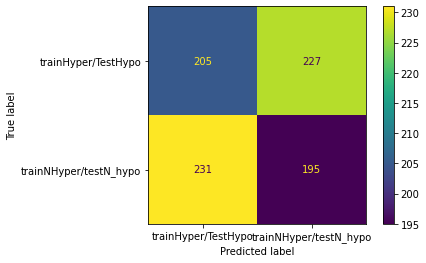

In [23]:
#classes = ['N_HYPO', 'HYPO', 'N_HYPER', 'HYPER']
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm, display_labels = ['trainHyper/TestHypo','trainNHyper/testN_hypo']).plot()
df_exp_f = np.zeros(cm.shape) # create a dataframe for expected frequencies
for i in range(cm.shape[1]):
    row = cm[i, :]
    exp = row.sum()/cm.shape[0] # get column's expected probability
    exp_col = np.full((cm.shape[0]),exp) # create row vector with 'exp' as values
    df_exp_f[i,:] = exp_col # replace exp_col in the df_exp_f
print('dataframe of expected frequencies : \n{}'.format(df_exp_f))
    
ddof = 1 # ddof id (4-1)(4-1) = 9
chi2_results = chisquare(cm, f_exp = df_exp_f, ddof = ddof, axis = None) 
print('Khi2 statistic = {:f} and p value = {:f} for degree of freedom = {:f}'.format(chi2_results[0],chi2_results[1],ddof))

## Train on Hypo run and test on Hyper run
    - target = 1 : modulation (Hyer/hypo)
    - target = 2 : Neutral cond.
    Accuracy = 0.49

dataframe of expected frequencies : 
[[216. 216.]
 [213. 213.]]
Khi2 statistic = 1.852374 and p value = 0.396061 for degree of freedom = 1.000000


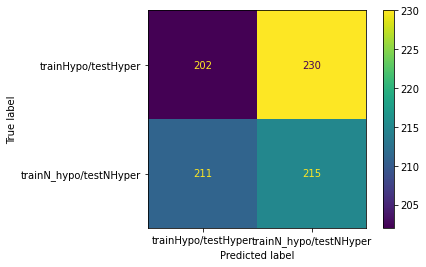

In [24]:
import numpy as np
cm = np.array([[202, 230],                                                                                                [211, 215]])
#classes = ['N_HYPO', 'HYPO', 'N_HYPER', 'HYPER']
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm, display_labels = ['trainHypo/testHyper','trainN_hypo/testNHyper']).plot()
df_exp_f = np.zeros(cm.shape) # create a dataframe for expected frequencies
for i in range(cm.shape[1]):
    row = cm[i, :]
    exp = row.sum()/cm.shape[0] # get column's expected probability
    exp_col = np.full((cm.shape[0]),exp) # create row vector with 'exp' as values
    df_exp_f[i,:] = exp_col # replace exp_col in the df_exp_f
print('dataframe of expected frequencies : \n{}'.format(df_exp_f))
    
ddof = 1 # ddof id (4-1)(4-1) = 9
chi2_results = chisquare(cm, f_exp = df_exp_f, ddof = ddof, axis = None) 
print('Khi2 statistic = {:f} and p value = {:f} for degree of freedom = {:f}'.format(chi2_results[0],chi2_results[1],ddof))